In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import os
import glob
import imageio
%matplotlib inline

from IPython.display import clear_output
from sklearn.preprocessing import QuantileTransformer
from tensorflow.keras.optimizers import Adam
from stable_baselines3 import PPO, A2C

In [3]:
import sys
sys.path.append(r"C:\Users\fidel\OneDrive\Documentos\Mestrado\code")
from SL_evaluations import get_model, pnl_metric, sharpe_metric, pnl_curve
from RL_trading_envs import MommyHouse, MommyHouseWithWind

In [4]:
path_save = r'C:\Users\fidel\OneDrive\Documentos\Mestrado\code\log_files'

In [7]:
def get_actions_by_grid(model, env, positions, wind = 0):
    list_actions = []
    for position in positions:
        state = env.features_to_state(position, wind)
        action, _ = model.predict(state, deterministic = True)
        list_actions.append(action.item())
    return list_actions

In [11]:
%%time
# agent_parameters = dict(learning_rate=0.0003,
#                         n_steps=2048,
#                         batch_size=64,
#                         n_epochs=10)
# agent_parameters = dict(learning_rate=0.0003,
#                         n_steps=2048,
#                         batch_size=2048,
#                         n_epochs=1)
agent_parameters = {}
# env   = MommyHouse()
env   = MommyHouseWithWind()
model = A2C('MlpPolicy', env, verbose=0, **agent_parameters)
positions = np.linspace(-15, 15, 100)
for i in range(100):
    clear_output(wait=True)
    model.learn(total_timesteps=1e4)
    list_actions = get_actions_by_grid(model, env, positions, wind = 0)
    plt.figure()
    plt.scatter(positions, list_actions)
    plt.grid()
    plt.title(i)
    plt.savefig(os.path.join(path_save, f'image_{i}.jpeg'))

Wall time: 16min 50s


In [12]:
filenames = glob.glob(os.path.join(path_save, 'image_*'))     
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave(os.path.join(path_save, 'gifs', 'movie.gif'), images, duration = 1)

<ipython-input-12-4b221678cccb>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


In [13]:
writer = imageio.get_writer(os.path.join(path_save, 'gifs', 'test.mp4'), fps=1)
filenames = glob.glob(os.path.join(path_save, 'image_*'))     
for filename in filenames:
    writer.append_data(imageio.imread(filename))
writer.close()


<ipython-input-13-703282fb7633>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  writer.append_data(imageio.imread(filename))


In [5]:
env   = MommyHouseWithWind()

In [29]:
positions = np.linspace(-30, 30, 100)
list_actions = get_actions_by_grid(positions = positions, wind = 1)

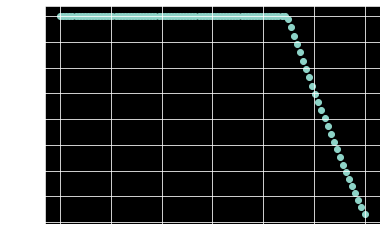

In [30]:
%matplotlib inline
plt.scatter(positions, list_actions)
plt.grid()

In [28]:
get_actions_by_grid(positions = [-1], wind = 3)

[1.0]

In [ ]:
def evaluate_agent(agent, env, initial_state = None):
    terminal = False
    cummulative_reward = 0
    env.reset()
    if initial_state is not None:
        env.state = initial_state
    while not terminal:
        action, _ = model.predict(env.state, deterministic = True)
        state, reward, terminal, _ = env.step(action)
        cummulative_reward += reward
    return cummulative_reward

In [50]:
state = env.features_to_state(position = -0.5, wind = 10)
action, _ = model.predict(state, deterministic = True)
action

array([-1.], dtype=float32)

In [30]:
env.state = env.features_to_state(position = -5, wind = 0)

In [31]:
env.state_to_features(as_dictionary = True)

{'position': -5.0, 'wind': 0.0}

In [16]:
%%time
agent_parameters = dict(learning_rate=0.0003,
                        n_steps=2048,
                        batch_size=64,
                        n_epochs=10)
# agent_parameters = dict(learning_rate=0.0003,
#                         n_steps=2048,
#                         batch_size=2048,
#                         n_epochs=1)
env   = StockEnvTrainOnePerTime(df, list_features)
model = A2C('MlpPolicy', env, verbose=0)
list_results = []
for _ in range(1600):
    clear_output(wait=True)
    model.learn(total_timesteps=1e4)
    yhat = get_actions(df, list_features, model).reshape(-1)
    list_results.append(pnl_metric(y, yhat)/0.15844)
    plt.plot(list_results)
    plt.show()

NameError: name 'StockEnvTrainOnePerTime' is not defined

In [ ]:
plt.hist(yhat)